<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP_CNN_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [1]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:maadv09DyyTGm5UB+/Thz6h5w1vwk6lKN2xSFWf3mSs root@8a23bd7e664f
The key's randomart image is:
+---[RSA 4096]----+
|          .    .+|
|           o   .B|
|          . o .+.|
|         + o =...|
|        S + *E+. |
|       + o Oo..*o|
|      . o oo=*.+=|
|         ...++*..|
|          o+=o.o |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [2]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts



# github.com:22 SSH-2.0-babeld-728b22c0


In [3]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDY+/OWCHpcAXigM88JyeyvXzjkWBbMIfrH0s6OSVI9uboccvpN5FYNj3j7ah+zAZaTDGORCH0Zt76Ot4+9mOxhwPE+5EC0Et2zKpPHdcyoJbpVZ3rggcu6Wc8sNQz5Oj9qwK5fyeix0OTM7o4Y8sNjSqahnE5je93Q9srRfV1ZnX+aDrytNldgQHEC6vwyPzeFp8e2/+l/Vn0/3zA52Te1DJJUH/TaFqTnhInpOnihk5o6zsCv/BWex1rUROfeW8uogw98so9UOLT+fWu6iWabb+C3nQaUSTNCmaMiPAe8P7/s6i/tPDHBBoqQSMmTIbEK72hgYlwMW/Khwlt5640P1ebFhNIyrK3ZTAU78uTjBIOilN0W29J1v6MjTg6fl9TSXJmP8xgFIMJdTzQM7arj7Szt7bY2EfoT8yXP64bBr0Vkm8scBU4oP0TGXxKPKxKL1F2uNBsUMjeAv+x1/C3I8ljVhrFuIZFtbs1rHlze7UqZhyWCmIlOII5rX4tpCQZeSD0M9fR7PPJnqRJa5YIox3SwHx7DxVWpsRa2VWFRwYAk12kMhORg7Sy6kqyON2V+YgtEXw4KqLsqdHvxLL0t/6jx+z1WPdIMOJ1bg0OccX8dAIpYx+lPWMVbusSRtHFM65nAL8dRLU899kM4TcMZNgfY5rfV4NxUo23XYzXnAw== root@8a23bd7e664f


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [4]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [5]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 289 (delta 17), reused 32 (delta 11), pack-reused 246
Receiving objects: 100% (289/289), 265.63 MiB | 24.49 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (31/31), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [6]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [7]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

!pip install talos

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 12.8MB 7.6MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 9.1MB 47.5MB/s 
     |████████████████████████████████| 460kB 46.2MB/s 
     |████████████████████████████████| 1.1MB 44.1MB/s 
     |████████████████████████████████| 122kB 59.1MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=5d75ca7adca502fbd889bfe90a4431d34951416a94ea11a8728842cb9a5ccec2
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-

     |████████████████████████████████| 93.4 MB 32 kB/s 
     |████████████████████████████████| 165.3 MB 40 kB/s 
     |████████████████████████████████| 2.1 MB 65.8 MB/s 
     |████████████████████████████████| 998 kB 44.6 MB/s 
     |████████████████████████████████| 3.3 MB 40.7 MB/s 
     |████████████████████████████████| 895 kB 42.2 MB/s 
2021-05-26 05:13:09.259066: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 9.5 MB 7.9 MB/s 
     |████████████████████████████████| 5.4 MB 56.1 MB/s 
     |████████████████████████████████| 2.6 MB 47.7 MB/s 
     |████████████████████████████████| 26.6 MB 117 kB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [9]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [10]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909748,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510776,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,116707715618748400,POLYCOM ASIA PACIFIC PTE. LTD.,SINGAPORE,NaN,tmt,telecommunication,network equipment supplier,upstream,https://www.sgpbusiness.com/company/Polycom-As...,WHOLESALE OF TELECOMMUNICATIONS EQUIPMENT (EXC...,NaN
9,120313950904532592,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [11]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [12]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 1000
Total number of countries: 7
Total number of sectors: 14
Total number of subsectors: 26
Total number of valuechain: 18


In [13]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE    359
THAILAND     244
MALAYSIA     223
CHINA        103
HONG KONG     36
INDONESIA     34
AUSTRALIA      1
Name: Country, dtype: int64

List of unique sector:
cni    291
tmt    257
oos     97
ong     97
CNI     74
TMT     42
ind     21
OOS     18
cg      15
IND     10
ONG      8
CG       8
REH      8
reh      6
Name: Sector, dtype: int64

List of unique valuechain:
midstream                 373
downstream                227
MIDSTREAM                  68
upstream                   51
Midstream                  24
Downstream                 23
upstream or downstream     17
DOWNSTREAM                 14
manufacturer               10
Upstream                   10
distributor                 6
Manufacturer                4
                            3
UPSTREAM                    3
across value chain          2
Across value chain          2
trader                      2
Upstream or Downstream      1
Name: Valuechain, dtype: int64


In [14]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
buildings & industrial               154
others                               115
consumer electronics                 111
building_material                    102
o&g                                   66
it_services                           59
cni_service providers                 57
semiconductor                         51
telecommunication                     40
utilities                             33
petrochemical                         30
retail n distribution                 22
digital_business                      20
metals and mining                     19
media                                 18
infrastructure                        14
auto & mec                            10
o&g_service providers/contractors      8
residential                            7
cni_equipment suppliers                5
commercial                             5
diversified                            2
agribusiness                           1
ioc/noc                        

In [15]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
buildings & industrial_contractor    143
others                               115
consumer electronics_distributor      96
building_material_manufacturer        62
it_services                           59
                                    ... 
tisp – fiber cable                     1
infrastructure_developer               1
residential_operator                   1
o&g_refiner                            1
base metal distributor                 1
Name: Archetype, Length: 61, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [16]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
995,LUX DISTRIBUTOR SDN. BHD.,MALAYSIA,cni,building_material,building_material_supplier_distributor,downstream,Lux Distributor Sdn Bhd provides building prod...
996,KJI INDUSTRIAL LIMITED,HONG KONG,tmt,consumer electronics,consumer electronics_distributor,downstream,Our wide product range including Citrus Juicer...
997,TEKNOSERV ENGINEERING SDN. BHD.,MALAYSIA,cni,utilities,utilities_developer,upstream,Teknoserv Engineering Sdn Bhd provides water s...
998,THERMAL SOLUTIONS ASIA PTE LTD,SINGAPORE,CNI,cni_service providers,cni_service providers,MIDSTREAM,"Founded in 2000, Thermal Solutions Asia Pte Lt..."


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [17]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
13,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
35,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
62,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
79,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
108,LUOTIAN COUNTY SILICON CARBIDE PLANT,CHINA,NaN,NaN,NaN,NaN,NaN
111,NEWTON INTERNATIONAL (HK) LIMITED,SINGAPORE,NaN,NaN,NaN,NaN,NaN
129,"ZHEJIANG-THAI PHOTOVOLTAIC TECHNOLOGY CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
162,RAINBOW BLISS LIMITED,SINGAPORE,NaN,NaN,NaN,NaN,NaN
195,VATCHAREE TANGTRAKOOLCHAROEN,THAILAND,NaN,NaN,NaN,NaN,NaN


In [18]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
995,LUX DISTRIBUTOR SDN. BHD.,MALAYSIA,cni,building_material,building_material_supplier_distributor,downstream,Lux Distributor Sdn Bhd provides building prod...
996,KJI INDUSTRIAL LIMITED,HONG KONG,tmt,consumer electronics,consumer electronics_distributor,downstream,Our wide product range including Citrus Juicer...
997,TEKNOSERV ENGINEERING SDN. BHD.,MALAYSIA,cni,utilities,utilities_developer,upstream,Teknoserv Engineering Sdn Bhd provides water s...
998,THERMAL SOLUTIONS ASIA PTE LTD,SINGAPORE,CNI,cni_service providers,cni_service providers,MIDSTREAM,"Founded in 2000, Thermal Solutions Asia Pte Lt..."


In [19]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 950


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

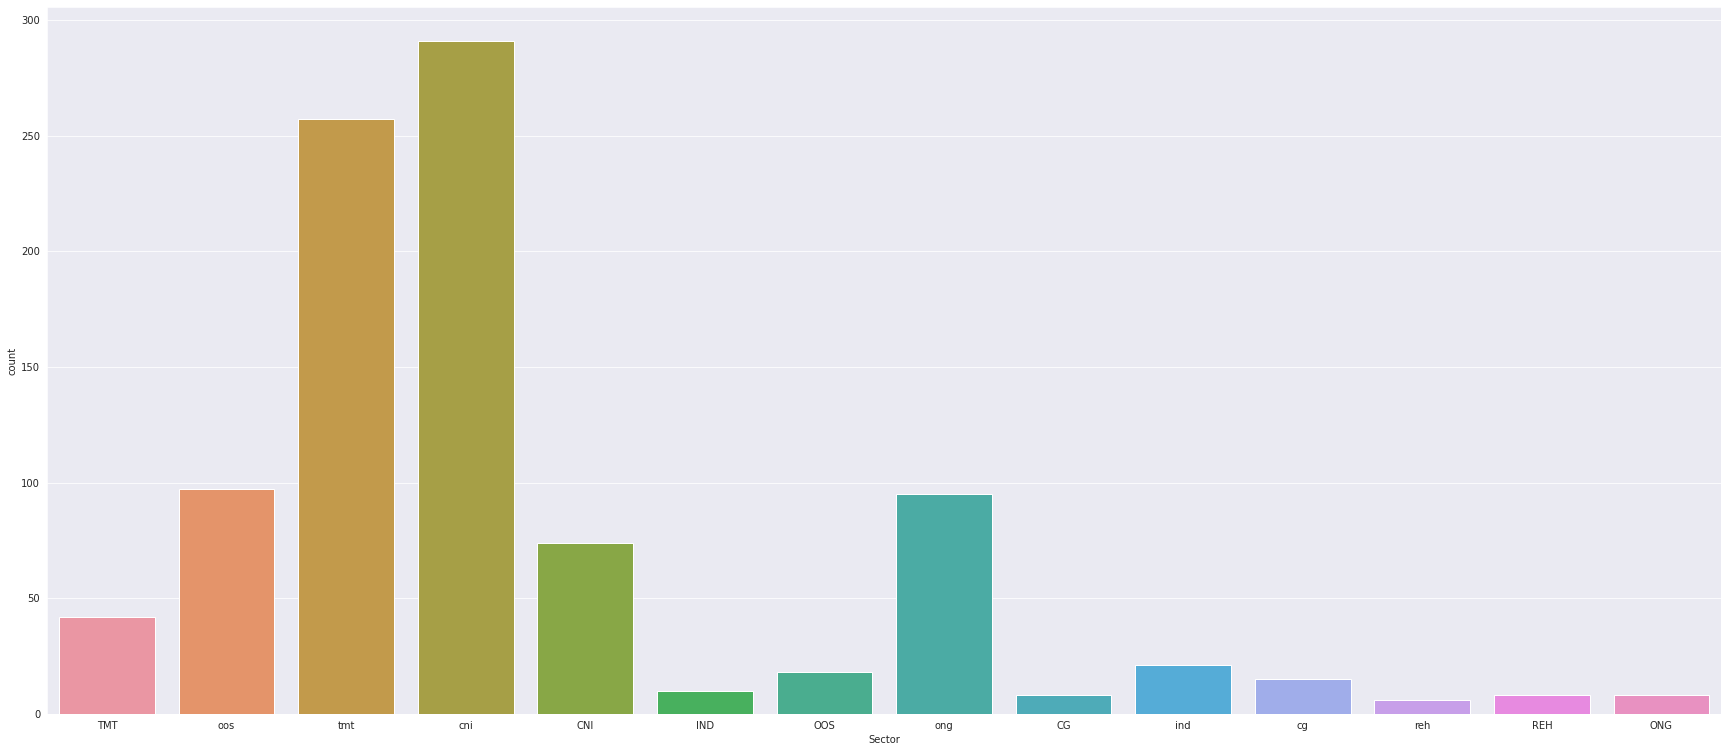

In [20]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

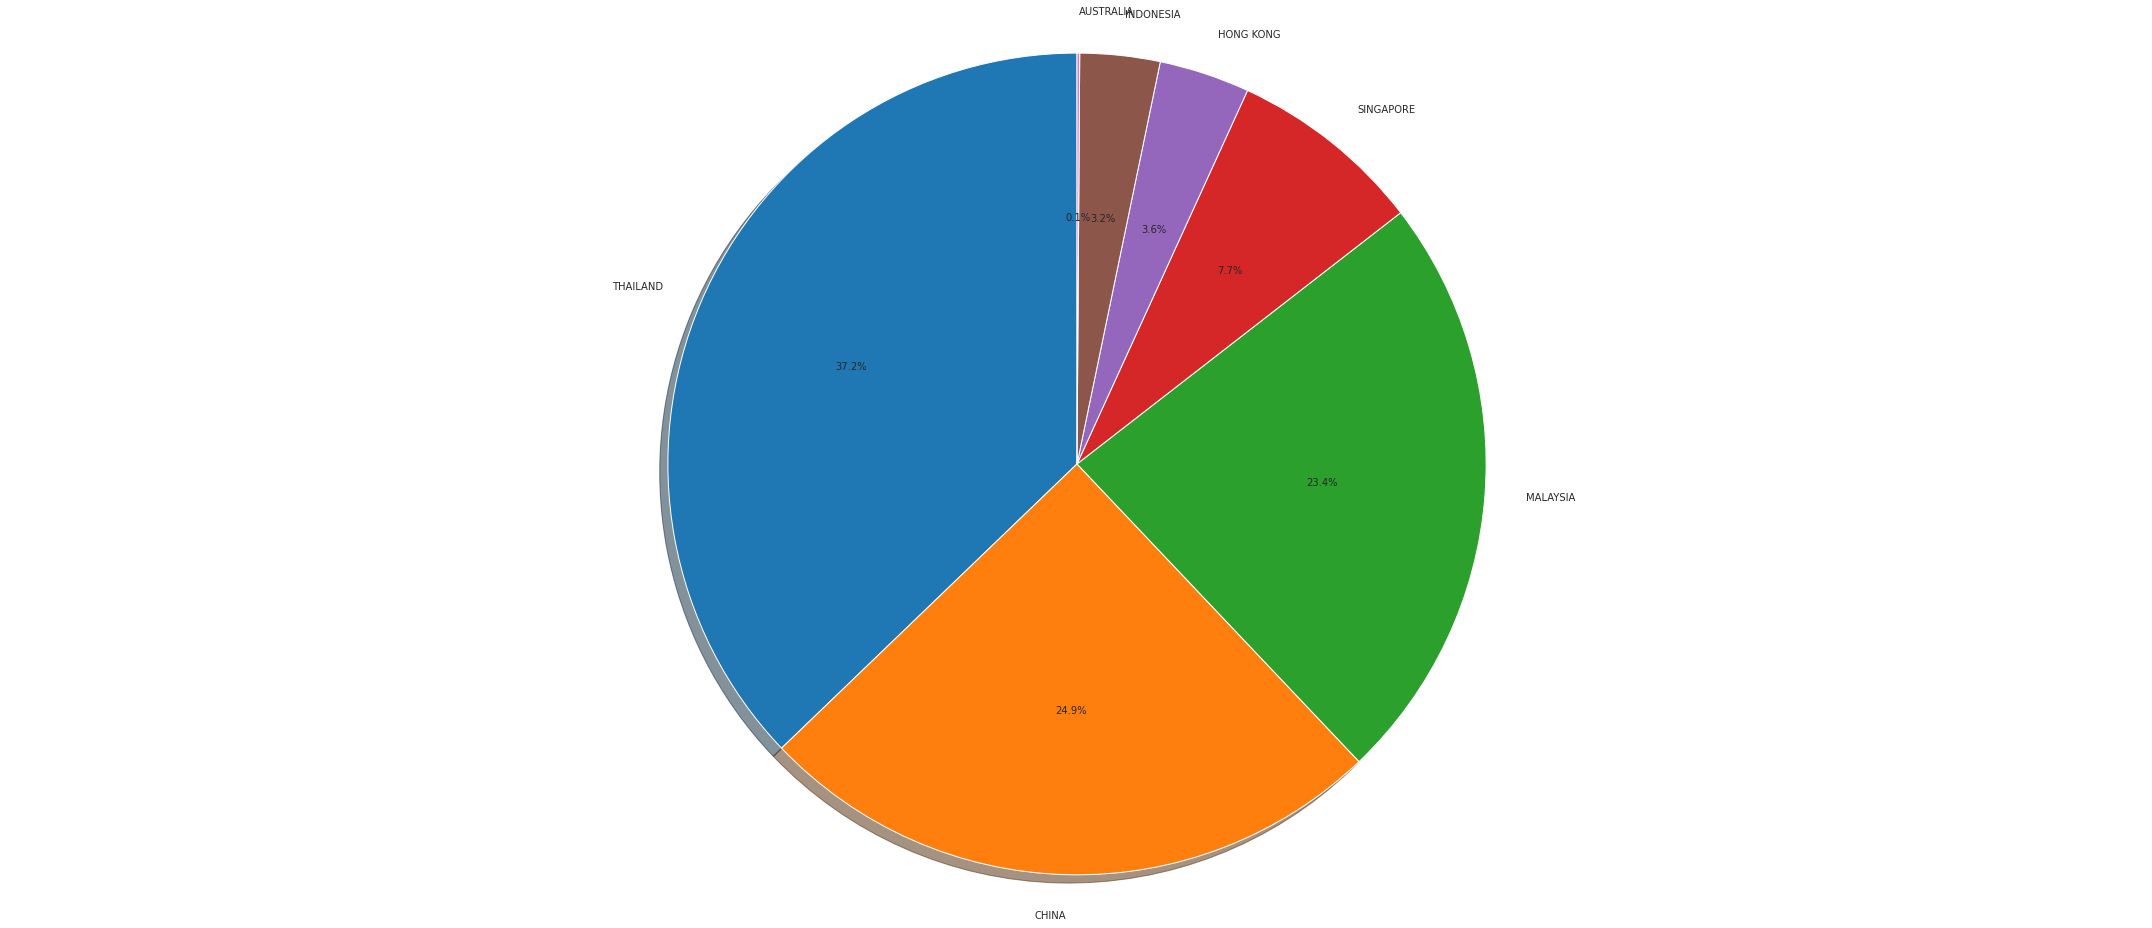

In [21]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [22]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [23]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [24]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


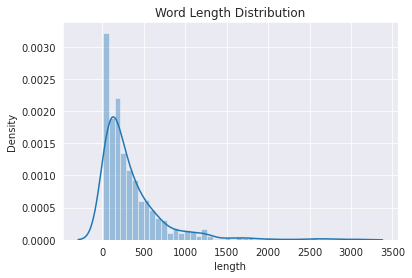

In [25]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [26]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
366,SHOPEE HONG KONG LIMITED,HONG KONG,tmt,digital_business,digital_business,midstream,"Shopee is the leading e-commerce platform in Southeast Asia and Taiwan. It is a platform tailored for the region, providing customers with an easy, secure and fast online shopping experience through strong payment and logistical support. Shopee aims to continually enhance its platform and become the region’s e-commerce destination of choice. Shopee has a wide selection of product categories ranging from consumer electronics to home & living, health & beauty, baby & toys, fashion and fitness equipment. Shopee, a Sea company, was first launched in Singapore in 2015, and has since expanded its reach to Malaysia, Thailand, Taiwan, Indonesia, Vietnam and the Philippines. Sea is a leader in digital entertainment, e-commerce and digital financial services across Greater Southeast Asia. Sea’s mission is to better the lives of consumers and small businesses with technology, and is listed on the NYSE under the symbol SE.",924.0
367,M-LINK SYSTEM (M) SDN. BHD.,MALAYSIA,tmt,consumer electronics,consumer electronics_distributor,downstream,"Formed in 1989, and with the rapid growth, the company has incorporated in 1994 as M-LINK SYSTEM (M) SDN BHD, with its headquarter in Petaling Jaya, Selangor and 7 branches located at strategic and important network points of Malaysia. M-Link System (M) Sdn Bhd has forged

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [27]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
995,LUX DISTRIBUTOR SDN. BHD.,MALAYSIA,cni,building_material,building_material_supplier_distributor,downstream,"Lux Distributor Sdn Bhd provides building products. The Company offers distribution of tiles, woods, doors, concrete, and other building_materials. Lux supplies its products throughout Malaysia.",194
996,KJI INDUSTRIAL LIMITED,HONG KONG,tmt,consumer electronics,consumer electronics_distributor,downstream,"Our wide product range including Citrus Juicer, Hand Blender, Hand Mixer, Stand Blender, Mini Chopper, Egg boiler, Electric knife... etc. Nowsdays, our products are selling to numerous worldwide brands all around the world.",223
997,TEKNOSERV ENGINEERING SDN. BHD.,MALAYSIA,cni,utilities,utilities_developer,upstream,"Teknoserv Engineering Sdn Bhd provides water services. The Company installs waste water and water treatment plants. Teknoserv Engineering operates in Shah Alam, Malaysia.",170
998,THERMAL SOLUTIONS ASIA PTE LTD,SINGAPORE,CNI,cni_service providers,cni_service providers,MIDSTREAM,"Founded in 2000, Thermal Solutions Asia Pte Ltd has become a leading supplier of Combustion Equipment and Related Services.",124


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [28]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist
df_keywords['list_tag']

7 32 92 9


0      [0, 0, 67, 1]
1      [0, 1, 27, 7]
2      [0, 1, 22, 5]
3      [0, 1, 73, 5]
4       [0, 1, 2, 3]
           ...      
91    [6, 30, 85, 5]
92    [6, 30, 86, 5]
93    [6, 30, 87, 5]
94    [6, 30, 83, 5]
95    [4, 24, 64, 0]
Name: list_tag, Length: 96, dtype: object

In [29]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Valuechain'])[0][0])

    taglist_df.append(temp)

df_valid['list_tag'] = taglist_df

### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [30]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [31]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []

    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [32]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

In [33]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATED, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LED, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]"
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]","[TONGDUN, TECHNOLOGY, PROFESSIONAL, THIRD-PARTY, INTELLIGENT, RISK, MANAGEMENT, DECISION-MAKING, SERVICE, PROVIDER, HEADQUARTER, HANGZHOU, ZHEJIANG, INTEGRATE, ARTIFICIAL, INTELLIGENCE, BUSINESS, SCENARIO, TONGDUN, TECHNOLOGY, OFFER, SOLUT

### 4.7. Bag of Words

---

Here, we will do Bag Of Words to tokenize our word vector.

In [34]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1473


In [35]:
# do bag of words
bow_vectors = []
for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,BoW_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATED, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LED, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]","

In [36]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_valid.drop(index, inplace=True)

df_valid.shape

(752, 11)

---
---

# 5.Models

### 5.1. Splitting into training and testing dataset.

---

Here, we will first split our training and testing dataset by a ration of 8:2 respectively.

In [37]:
import keras
import tensorflow

print('--- Version Checking ---')
print("Keras:", keras.__version__)

vector = np.vectorize(np.float)

--- Version Checking ---
Keras: 2.5.0


In [38]:
from tensorflow.keras.preprocessing import sequence

# do random shuffling to ensure randomness
df_valid.sample(frac=1, random_state=752)

# split data set by 7:3 for train and test
distribution = int(df_valid.shape[0] * 0.7)

# split datasets to train and test and validation by 70%, 30% and then 80% and 20% for validation and test fraction respectively
df_train = df_valid.iloc[:distribution]
df_test = df_valid.iloc[distribution:distribution+180]
df_validation = df_valid.iloc[distribution+180:]

df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)
df_validation.fillna(0 , inplace=True)

X_train = sequence.pad_sequences(np.array(list(df_train['BoW_vectors'])))
y_train = np.array(list(df_train['list_tag']))

X_test = sequence.pad_sequences(np.array(list(df_test['BoW_vectors'])))
y_test = np.array(list(df_test['list_tag']))

X_validation = sequence.pad_sequences(np.array(list(df_validation['BoW_vectors'])))
y_validation = np.array(list(df_validation['list_tag']))

print(f'Train data shape: {X_train.shape}\nTest data shape: {X_test.shape}\nValidation data shape: {X_validation.shape}')

Train data shape: (526, 1473)
Test data shape: (180, 1473)
Validation data shape: (46, 1473)


In [39]:
print(f'Train data labels: {y_train.__len__()}\nTest data labels: {y_test.__len__()}\nValidation data labels: {y_validation.__len__()}')

Train data labels: 526
Test data labels: 180
Validation data labels: 46


### 5.2. Training CNN Model

---

Here, we will train our CNN model. We will also be doing some hyperparameter tuning to get the best result.

In [40]:
p = {'activation' : ['relu'],
    'losses' : ['binary_crossentropy', 'categorical_crossentropy'],
    'shapes' : ['brick'],
    'first_neuron' : [512],
    'hidden_layers' : [1, 2],
    'dropout' : [0.2, 0.3, 0.4],
    'kernel_initializer' : ['normal', 'glorot_normal'],
    'batch_size' : [20, 21, 22]
}

In [41]:
# create CNN model
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, GlobalMaxPooling1D, Embedding, Input, Flatten
from tensorflow.keras import Sequential
from talos.utils import hidden_layers, ExperimentLogCallback
import talos as ts

def create_model(X_train, y_train, X_validation, y_validation, params):

    # # create a if else here in order to label the models
    if len(y_train[0]) == len(sector):
      name = 'sector_model'
      exp_name = 'sector_model_experiment'
    elif len(y_train[0]) == len(subsector):
      name = 'subsector_model'
      exp_name = 'subsector_model_experiment'
    elif len(y_train[0]) == len(archetype):
      name = 'archetype_model'
      exp_name = 'archetype_model_experiment'
    elif len(y_train[0]) == len(valuechain):
      name = 'valuechain_model'
      exp_name = 'valuechain_model_experiment'

    model = Sequential(name=name)

    # # hidden layers design 1
    # series_input = Input(shape=(len(keywords_masterlist), ))
    # model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same', input_shape=series_input.shape))
    # hidden_layers(model, params, len(y_train[0]))
    # model.add(Conv1D(filters=512, kernel_size=5, activation='relu', padding='same'))
    # model.add(MaxPooling1D(pool_size=2, padding='same'))
    # model.add(GlobalMaxPooling1D())
    # model.add(Dropout(params['dropout']))
    # model.add(Dense(params['first_neuron'], kernel_initializer=params['kernel_initializer'], activation=params['activation']))

    # hidden layers design 2 (Decent)
    series_input = Input(shape=(len(keywords_masterlist), ))
    model.add(Conv1D(filters=params['first_neuron'], kernel_size=5, activation=params['activation'], padding='same', input_shape=series_input.shape))
    hidden_layers(model, params, len(y_train[0]))
    model.add(Conv1D(filters=128, kernel_size=5, activation=params['activation'], padding='same'))
    model.add(Conv1D(filters=256, kernel_size=5, activation=params['activation'], padding='same'))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(params['dropout']))
    hidden_layers(model, params, len(y_train[0]))

    # # hidden layers design 3 (Bad)
    # series_input = Input(shape=(len(keywords_masterlist), ))
    # model.add(Conv1D(filters=params['first_neuron'], kernel_size=5, activation=params['activation'], padding='same', input_shape=series_input.shape))
    # hidden_layers(model, params, len(y_train[0]))
    # model.add(Conv1D(filters=128, kernel_size=5, activation=params['activation'], padding='same'))
    # model.add(Dropout(params['dropout']))
    # model.add(Conv1D(filters=256, kernel_size=5, activation=params['activation'], padding='same'))
    # model.add(Dropout(params['dropout']))
    # model.add(MaxPooling1D(pool_size=2, padding='same'))
    # model.add(GlobalMaxPooling1D())
    # model.add(Dropout(params['dropout']))
    # hidden_layers(model, params, len(y_train[0]))

    # output
    model.add(Dense(len(y_train[0]), activation='softmax'))

    # compile model
    model.compile(loss=params['losses'], optimizer='adam', metrics=['accuracy'])

    # history
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=200, batch_size=params['batch_size'], callbacks=[ExperimentLogCallback(exp_name,params)], verbose=0)

    return history, model

# one hot encode
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [42]:
print(one_hot(y_train[:,0], len(sector)).shape)

(526, 7)


In [43]:
X_train = vector(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]))
X_validation = vector(X_validation.reshape(X_validation.shape[0], 1, X_validation.shape[1]))
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [44]:
# split into multijobs for faster processing
from talos.utils.gpu_utils import parallel_gpu_jobs
parallel_gpu_jobs(0.25)

# plot a real life dataplot
test_sector_model = ts.Scan(x=X_train, y=one_hot(y_train[:,0], tag_counts[0]), params = p, model=create_model, experiment_name='sector_model_experiment', random_method='sobol', print_params=True)
test_subsector_model = ts.Scan(x=X_train, y=one_hot(y_train[:,1], tag_counts[1]), params = p, model=create_model, experiment_name='subsector_model_experiment', random_method='sobol', print_params=True)
test_archetype_model = ts.Scan(x=X_train, y=one_hot(y_train[:,2], tag_counts[2]), params = p, model=create_model, experiment_name='archetype_model_experiment', random_method='sobol', print_params=True)
test_valuechain_model = ts.Scan(x=X_train, y=one_hot(y_train[:,3], tag_counts[3]), params = p, model=create_model, experiment_name='valuechain_model_experiment', random_method='sobol', print_params=True)

  0%|          | 0/72 [00:00<?, ?it/s]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  1%|▏         | 1/72 [00:41<48:31, 41.00s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  3%|▎         | 2/72 [01:22<48:07, 41.25s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  4%|▍         | 3/72 [02:04<47:39, 41.45s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  6%|▌         | 4/72 [02:46<47:06, 41.57s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  7%|▋         | 5/72 [03:14<41:53, 37.51s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  8%|▊         | 6/72 [03:56<42:44, 38.86s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 10%|▉         | 7/72 [04:24<38:34, 35.61s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 11%|█         | 8/72 [05:06<40:02, 37.54s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 12%|█▎        | 9/72 [05:48<40:47, 38.85s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 14%|█▍        | 10/72 [06:14<36:10, 35.00s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 15%|█▌        | 11/72 [06:40<32:46, 32.24s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 17%|█▋        | 12/72 [07:22<35:07, 35.13s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 18%|█▊        | 13/72 [07:50<32:26, 32.99s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 19%|█▉        | 14/72 [08:32<34:30, 35.70s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 21%|██        | 15/72 [09:14<35:44, 37.62s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 22%|██▏       | 16/72 [09:43<32:34, 34.91s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 24%|██▎       | 17/72 [10:24<33:56, 37.02s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 25%|██▌       | 18/72 [11:06<34:37, 38.48s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 26%|██▋       | 19/72 [11:32<30:41, 34.74s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 28%|██▊       | 20/72 [11:58<27:48, 32.09s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 29%|██▉       | 21/72 [12:40<29:49, 35.09s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 31%|███       | 22/72 [13:22<30:58, 37.17s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 32%|███▏      | 23/72 [13:50<28:07, 34.44s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 33%|███▎      | 24/72 [14:19<26:04, 32.59s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 35%|███▍      | 25/72 [15:01<27:43, 35.39s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 36%|███▌      | 26/72 [15:26<24:53, 32.46s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 38%|███▊      | 27/72 [15:51<22:39, 30.21s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 39%|███▉      | 28/72 [16:17<21:06, 28.78s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 40%|████      | 29/72 [16:44<20:14, 28.24s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 42%|████▏     | 30/72 [17:11<19:34, 27.96s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 43%|████▎     | 31/72 [17:38<18:53, 27.65s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 44%|████▍     | 32/72 [18:20<21:18, 31.97s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 46%|████▌     | 33/72 [19:02<22:43, 34.95s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 47%|████▋     | 34/72 [19:27<20:20, 32.12s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 49%|████▊     | 35/72 [20:09<21:37, 35.06s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 50%|█████     | 36/72 [20:51<22:15, 37.10s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 51%|█████▏    | 37/72 [21:18<19:52, 34.06s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 53%|█████▎    | 38/72 [22:00<20:39, 36.45s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 54%|█████▍    | 39/72 [22:27<18:27, 33.57s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 56%|█████▌    | 40/72 [22:54<16:54, 31.71s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 57%|█████▋    | 41/72 [23:36<17:57, 34.76s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 58%|█████▊    | 42/72 [24:18<18:26, 36.89s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 60%|█████▉    | 43/72 [24:43<16:04, 33.27s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 61%|██████    | 44/72 [25:08<14:26, 30.93s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 62%|██████▎   | 45/72 [25:35<13:23, 29.74s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 64%|██████▍   | 46/72 [26:17<14:29, 33.43s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 65%|██████▌   | 47/72 [26:44<13:06, 31.44s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 67%|██████▋   | 48/72 [27:26<13:50, 34.61s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 68%|██████▊   | 49/72 [28:08<14:06, 36.80s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 69%|██████▉   | 50/72 [28:31<11:57, 32.60s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 71%|███████   | 51/72 [28:54<10:22, 29.62s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 72%|███████▏  | 52/72 [29:16<09:10, 27.51s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 74%|███████▎  | 53/72 [29:41<08:25, 26.60s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 75%|███████▌  | 54/72 [30:05<07:48, 26.02s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 76%|███████▋  | 55/72 [30:30<07:14, 25.57s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 78%|███████▊  | 56/72 [31:12<08:07, 30.50s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 79%|███████▉  | 57/72 [31:34<07:01, 28.11s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 81%|████████  | 58/72 [32:16<07:31, 32.24s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 82%|████████▏ | 59/72 [32:58<07:36, 35.13s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 83%|████████▎ | 60/72 [33:40<07:25, 37.15s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 85%|████████▍ | 61/72 [34:22<07:04, 38.62s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 86%|████████▌ | 62/72 [34:47<05:44, 34.44s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 88%|████████▊ | 63/72 [35:11<04:42, 31.38s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 89%|████████▉ | 64/72 [35:36<03:54, 29.35s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 90%|█████████ | 65/72 [35:58<03:11, 27.29s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 92%|█████████▏| 66/72 [36:21<02:35, 25.93s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 93%|█████████▎| 67/72 [36:44<02:04, 24.96s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 94%|█████████▍| 68/72 [37:25<02:00, 30.03s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 96%|█████████▌| 69/72 [37:50<01:24, 28.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 97%|█████████▋| 70/72 [38:15<00:54, 27.31s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 99%|█████████▊| 71/72 [38:57<00:31, 31.74s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  0%|          | 0/72 [00:00<?, ?it/s]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  1%|▏         | 1/72 [00:25<30:32, 25.81s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  3%|▎         | 2/72 [00:51<30:06, 25.81s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  4%|▍         | 3/72 [01:17<29:49, 25.93s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  6%|▌         | 4/72 [01:59<34:47, 30.70s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  7%|▋         | 5/72 [02:27<33:27, 29.96s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  8%|▊         | 6/72 [03:09<36:56, 33.58s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 10%|▉         | 7/72 [03:37<34:25, 31.78s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 11%|█         | 8/72 [04:19<37:10, 34.85s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 12%|█▎        | 9/72 [04:44<33:38, 32.03s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 14%|█▍        | 10/72 [05:26<36:08, 34.97s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 15%|█▌        | 11/72 [05:52<32:48, 32.27s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 17%|█▋        | 12/72 [06:34<35:09, 35.16s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 18%|█▊        | 13/72 [07:02<32:26, 33.00s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 19%|█▉        | 14/72 [07:30<30:23, 31.44s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 21%|██        | 15/72 [07:58<28:51, 30.37s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 22%|██▏       | 16/72 [08:40<31:36, 33.87s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 24%|██▎       | 17/72 [09:22<33:15, 36.28s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 25%|██▌       | 18/72 [10:04<34:10, 37.98s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 26%|██▋       | 19/72 [10:46<34:35, 39.16s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 28%|██▊       | 20/72 [11:12<30:32, 35.23s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 29%|██▉       | 21/72 [11:39<28:01, 32.96s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 31%|███       | 22/72 [12:07<26:12, 31.45s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 32%|███▏      | 23/72 [12:35<24:50, 30.42s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 33%|███▎      | 24/72 [13:03<23:44, 29.67s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 35%|███▍      | 25/72 [13:28<22:06, 28.22s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 36%|███▌      | 26/72 [14:10<24:46, 32.31s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 38%|███▊      | 27/72 [14:35<22:31, 30.03s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 39%|███▉      | 28/72 [15:16<24:37, 33.58s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 40%|████      | 29/72 [15:43<22:33, 31.47s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 42%|████▏     | 30/72 [16:10<21:04, 30.10s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 43%|████▎     | 31/72 [16:52<23:01, 33.70s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 44%|████▍     | 32/72 [17:34<24:07, 36.19s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 46%|████▌     | 33/72 [17:59<21:17, 32.75s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 47%|████▋     | 34/72 [18:24<19:20, 30.53s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 49%|████▊     | 35/72 [19:06<20:55, 33.94s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 50%|█████     | 36/72 [19:31<18:46, 31.30s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 51%|█████▏    | 37/72 [19:58<17:27, 29.93s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 53%|█████▎    | 38/72 [20:25<16:28, 29.08s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 54%|█████▍    | 39/72 [21:07<18:08, 32.98s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 56%|█████▌    | 40/72 [21:49<19:02, 35.70s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 57%|█████▋    | 41/72 [22:14<16:45, 32.45s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 58%|█████▊    | 42/72 [22:56<17:38, 35.28s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 60%|█████▉    | 43/72 [23:21<15:32, 32.17s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 61%|██████    | 44/72 [23:46<14:02, 30.11s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 62%|██████▎   | 45/72 [24:13<13:05, 29.10s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 64%|██████▍   | 46/72 [24:55<14:17, 32.99s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 65%|██████▌   | 47/72 [25:37<14:52, 35.71s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 67%|██████▋   | 48/72 [26:04<13:14, 33.10s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 68%|██████▊   | 49/72 [26:46<13:42, 35.74s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 69%|██████▉   | 50/72 [27:09<11:41, 31.90s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 71%|███████   | 51/72 [27:51<12:12, 34.90s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 72%|███████▏  | 52/72 [28:14<10:26, 31.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 74%|███████▎  | 53/72 [28:38<09:16, 29.26s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 75%|███████▌  | 54/72 [29:03<08:21, 27.85s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 76%|███████▋  | 55/72 [29:27<07:35, 26.78s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 78%|███████▊  | 56/72 [30:09<08:21, 31.36s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 79%|███████▉  | 57/72 [30:51<08:37, 34.53s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 81%|████████  | 58/72 [31:33<08:34, 36.73s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 82%|████████▏ | 59/72 [31:55<07:02, 32.48s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 83%|████████▎ | 60/72 [32:18<05:54, 29.56s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 85%|████████▍ | 61/72 [33:00<06:06, 33.33s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 86%|████████▌ | 62/72 [33:42<05:59, 35.94s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 88%|████████▊ | 63/72 [34:07<04:53, 32.58s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 89%|████████▉ | 64/72 [34:32<04:02, 30.26s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 90%|█████████ | 65/72 [35:14<03:56, 33.76s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 92%|█████████▏| 66/72 [35:37<03:04, 30.69s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 93%|█████████▎| 67/72 [36:01<02:22, 28.57s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 94%|█████████▍| 68/72 [36:43<02:10, 32.57s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 96%|█████████▌| 69/72 [37:25<01:46, 35.44s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 97%|█████████▋| 70/72 [37:50<01:04, 32.28s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 99%|█████████▊| 71/72 [38:32<00:35, 35.22s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  0%|          | 0/72 [00:00<?, ?it/s]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  1%|▏         | 1/72 [00:41<49:37, 41.94s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  3%|▎         | 2/72 [01:23<48:54, 41.92s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  4%|▍         | 3/72 [01:49<42:44, 37.17s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  6%|▌         | 4/72 [02:16<38:25, 33.90s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  7%|▋         | 5/72 [02:44<35:50, 32.09s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  8%|▊         | 6/72 [03:26<38:34, 35.07s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 10%|▉         | 7/72 [04:08<40:16, 37.18s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 11%|█         | 8/72 [04:50<41:12, 38.63s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 12%|█▎        | 9/72 [05:32<41:36, 39.62s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 14%|█▍        | 10/72 [05:58<36:47, 35.61s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 15%|█▌        | 11/72 [06:24<33:21, 32.82s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 17%|█▋        | 12/72 [07:06<35:31, 35.53s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 18%|█▊        | 13/72 [07:34<32:42, 33.26s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 19%|█▉        | 14/72 [08:16<34:41, 35.89s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 21%|██        | 15/72 [08:44<31:54, 33.59s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 22%|██▏       | 16/72 [09:13<29:55, 32.06s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 24%|██▎       | 17/72 [09:55<32:06, 35.02s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 25%|██▌       | 18/72 [10:37<33:21, 37.07s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 26%|██▋       | 19/72 [11:18<34:01, 38.52s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 28%|██▊       | 20/72 [12:00<34:15, 39.53s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 29%|██▉       | 21/72 [12:42<34:16, 40.32s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 31%|███       | 22/72 [13:11<30:35, 36.70s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 32%|███▏      | 23/72 [13:53<31:17, 38.32s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 33%|███▎      | 24/72 [14:21<28:14, 35.31s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 35%|███▍      | 25/72 [14:47<25:21, 32.36s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 36%|███▌      | 26/72 [15:28<27:00, 35.22s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 38%|███▊      | 27/72 [15:54<24:07, 32.16s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 39%|███▉      | 28/72 [16:35<25:43, 35.07s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 40%|████      | 29/72 [17:17<26:38, 37.17s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 42%|████▏     | 30/72 [17:45<23:59, 34.27s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 43%|████▎     | 31/72 [18:27<25:01, 36.61s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 44%|████▍     | 32/72 [18:55<22:35, 33.88s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 46%|████▌     | 33/72 [19:20<20:18, 31.24s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 47%|████▋     | 34/72 [20:01<21:48, 34.43s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 49%|████▊     | 35/72 [20:27<19:31, 31.67s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 50%|█████     | 36/72 [21:09<20:50, 34.74s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 51%|█████▏    | 37/72 [21:36<18:55, 32.43s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 53%|█████▎    | 38/72 [22:03<17:31, 30.93s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 54%|█████▍    | 39/72 [22:45<18:51, 34.28s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 56%|█████▌    | 40/72 [23:13<17:10, 32.21s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 57%|█████▋    | 41/72 [23:54<18:08, 35.12s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 58%|█████▊    | 42/72 [24:36<18:34, 37.15s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 60%|█████▉    | 43/72 [25:18<18:38, 38.58s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 61%|██████    | 44/72 [26:00<18:27, 39.57s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 62%|██████▎   | 45/72 [26:42<18:08, 40.32s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 64%|██████▍   | 46/72 [27:24<17:41, 40.84s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 65%|██████▌   | 47/72 [27:51<15:15, 36.63s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 67%|██████▋   | 48/72 [28:18<13:32, 33.84s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 68%|██████▊   | 49/72 [28:41<11:40, 30.47s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 69%|██████▉   | 50/72 [29:04<10:23, 28.33s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 71%|███████   | 51/72 [29:46<11:20, 32.42s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 72%|███████▏  | 52/72 [30:28<11:45, 35.26s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 74%|███████▎  | 53/72 [31:10<11:48, 37.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 75%|███████▌  | 54/72 [31:52<11:37, 38.72s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 76%|███████▋  | 55/72 [32:17<09:47, 34.57s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 78%|███████▊  | 56/72 [32:59<09:48, 36.81s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 79%|███████▉  | 57/72 [33:22<08:11, 32.75s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 81%|████████  | 58/72 [34:04<08:16, 35.49s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 82%|████████▏ | 59/72 [34:27<06:50, 31.58s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 83%|████████▎ | 60/72 [35:09<06:56, 34.67s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 85%|████████▍ | 61/72 [35:51<06:45, 36.89s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 86%|████████▌ | 62/72 [36:33<06:24, 38.44s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 88%|████████▊ | 63/72 [36:57<05:08, 34.24s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 89%|████████▉ | 64/72 [37:22<04:11, 31.50s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 90%|█████████ | 65/72 [38:04<04:02, 34.63s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 92%|█████████▏| 66/72 [38:46<03:40, 36.81s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 93%|█████████▎| 67/72 [39:09<02:43, 32.68s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 94%|█████████▍| 68/72 [39:32<01:59, 29.83s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 96%|█████████▌| 69/72 [40:15<01:40, 33.50s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 97%|█████████▋| 70/72 [40:40<01:01, 30.95s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 99%|█████████▊| 71/72 [41:22<00:34, 34.29s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  0%|          | 0/72 [00:00<?, ?it/s]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  1%|▏         | 1/72 [00:26<31:07, 26.31s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  3%|▎         | 2/72 [00:52<30:38, 26.26s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  4%|▍         | 3/72 [01:34<35:35, 30.96s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  6%|▌         | 4/72 [02:16<38:48, 34.24s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


  7%|▋         | 5/72 [02:58<40:53, 36.62s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


  8%|▊         | 6/72 [03:26<37:32, 34.13s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 10%|▉         | 7/72 [03:55<35:04, 32.38s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 11%|█         | 8/72 [04:23<33:19, 31.24s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 12%|█▎        | 9/72 [05:05<36:10, 34.45s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 14%|█▍        | 10/72 [05:47<37:54, 36.69s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 15%|█▌        | 11/72 [06:29<38:54, 38.27s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 17%|█▋        | 12/72 [07:11<39:21, 39.36s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 18%|█▊        | 13/72 [07:39<35:29, 36.09s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 19%|█▉        | 14/72 [08:08<32:40, 33.79s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 21%|██        | 15/72 [08:50<34:28, 36.29s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 22%|██▏       | 16/72 [09:19<31:45, 34.02s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 24%|██▎       | 17/72 [09:45<29:04, 31.72s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 25%|██▌       | 18/72 [10:27<31:17, 34.76s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 26%|██▋       | 19/72 [11:09<32:36, 36.91s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 28%|██▊       | 20/72 [11:35<29:17, 33.80s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 29%|██▉       | 21/72 [12:17<30:50, 36.29s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 31%|███       | 22/72 [12:59<31:40, 38.02s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 32%|███▏      | 23/72 [13:27<28:35, 35.01s/it]

{'activation': 'relu', 'batch_size': 20, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 33%|███▎      | 24/72 [13:56<26:25, 33.03s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 35%|███▍      | 25/72 [14:21<24:08, 30.82s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 36%|███▌      | 26/72 [14:47<22:25, 29.24s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 38%|███▊      | 27/72 [15:29<24:47, 33.05s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 39%|███▉      | 28/72 [16:11<26:10, 35.70s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 40%|████      | 29/72 [16:38<23:43, 33.10s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 42%|████▏     | 30/72 [17:05<21:59, 31.42s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 43%|████▎     | 31/72 [17:33<20:41, 30.27s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 44%|████▍     | 32/72 [18:00<19:35, 29.39s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 46%|████▌     | 33/72 [18:42<21:32, 33.15s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 47%|████▋     | 34/72 [19:08<19:32, 30.84s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 49%|████▊     | 35/72 [19:33<18:00, 29.21s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 50%|█████     | 36/72 [20:15<19:48, 33.02s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 51%|█████▏    | 37/72 [20:57<20:50, 35.74s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 53%|█████▎    | 38/72 [21:25<18:50, 33.25s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 54%|█████▍    | 39/72 [21:52<17:16, 31.40s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 56%|█████▌    | 40/72 [22:34<18:27, 34.60s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 57%|█████▋    | 41/72 [23:16<19:00, 36.80s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 58%|█████▊    | 42/72 [23:42<16:46, 33.55s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 60%|█████▉    | 43/72 [24:07<14:59, 31.03s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 61%|██████    | 44/72 [24:32<13:44, 29.44s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 62%|██████▎   | 45/72 [25:15<14:57, 33.23s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 64%|██████▍   | 46/72 [25:57<15:32, 35.87s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 65%|██████▌   | 47/72 [26:24<13:51, 33.26s/it]

{'activation': 'relu', 'batch_size': 21, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 67%|██████▋   | 48/72 [26:51<12:34, 31.45s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 68%|██████▊   | 49/72 [27:14<11:03, 28.86s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 69%|██████▉   | 50/72 [27:37<09:57, 27.15s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 71%|███████   | 51/72 [28:19<11:03, 31.60s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 72%|███████▏  | 52/72 [29:01<11:33, 34.69s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 74%|███████▎  | 53/72 [29:25<10:00, 31.63s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 75%|███████▌  | 54/72 [29:51<08:55, 29.74s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 76%|███████▋  | 55/72 [30:15<08:00, 28.26s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.2, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 78%|███████▊  | 56/72 [30:41<07:17, 27.36s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 79%|███████▉  | 57/72 [31:03<06:29, 25.96s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 81%|████████  | 58/72 [31:45<07:10, 30.73s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 82%|████████▏ | 59/72 [32:08<06:09, 28.39s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 83%|████████▎ | 60/72 [32:31<05:22, 26.84s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 85%|████████▍ | 61/72 [32:56<04:47, 26.18s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 86%|████████▌ | 62/72 [33:38<05:09, 30.94s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 88%|████████▊ | 63/72 [34:20<05:08, 34.30s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.3, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 89%|████████▉ | 64/72 [34:45<04:12, 31.52s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 90%|█████████ | 65/72 [35:27<04:02, 34.65s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 92%|█████████▏| 66/72 [35:50<03:06, 31.16s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 93%|█████████▎| 67/72 [36:32<02:51, 34.39s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 1, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 94%|█████████▍| 68/72 [37:14<02:26, 36.64s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 96%|█████████▌| 69/72 [37:39<01:39, 33.06s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


 97%|█████████▋| 70/72 [38:04<01:01, 30.68s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'binary_crossentropy', 'shapes': 'brick'}


 99%|█████████▊| 71/72 [38:29<00:28, 28.91s/it]

{'activation': 'relu', 'batch_size': 22, 'dropout': 0.4, 'first_neuron': 512, 'hidden_layers': 2, 'kernel_initializer': 'glorot_normal', 'losses': 'categorical_crossentropy', 'shapes': 'brick'}


100%|██████████| 72/72 [39:11<00:00, 32.66s/it]


### 5.3 Evaluate Models

---

Since we have completed training the models, now we will evaluate them.

In [45]:
# analyse the scan results
# we now plot out a heat map to see which factor affects the accuracy and val_loss the most
sector_model = ts.Analyze(test_sector_model)
subsector_model = ts.Analyze(test_subsector_model)
valuechain_model = ts.Analyze(test_valuechain_model)
archetype_model = ts.Analyze(test_archetype_model)

In [46]:
sector_model.table('accuracy')

,loss,round_epochs,val_accuracy,batch_size,first_neuron,kernel_initializer,losses,dropout,accuracy,end,val_loss,activation,duration,shapes,start,hidden_layers
36,0.034718,200,0.715190,21,512,normal,binary_crossentropy,0.3,0.951087,05/26/21-053608,1.345392,relu,26.737047,brick,05/26/21-053541,2
32,0.036329,200,0.734177,21,512,normal,binary_crossentropy,0.3,0.951087,05/26/21-053352,0.712220,relu,41.684215,brick,05/26/21-053310,1
21,0.151104,200,0.740506,20,512,normal,categorical_crossentropy,0.4,0.951087,05/26/21-052812,5.772580,relu,41.793116,brick,05/26/21-052730,2
20,0.035184,200,0.715190,20,512,normal,binary_crossentropy,0.4,0.951087,05/26/21-052730,1.512692,relu,41.840611,brick,05/26/21-052648,2
60,0.036124,200,0.746835,22,512,normal,binary_crossentropy,0.3,0.948370,05/26/21-054912,1.225558,relu,41.837536,brick,05/26/21-054830,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.128364,200,0.772152,21,512,normal,categorical_crossentropy,0.3,0.932065,05/26/21-053417,3.904301,relu,25.311139,brick,05/26/21-053352,1
28,0.081963,200,0.689873,21,512,normal,binary_crossentropy,0.2,0.932065,05/26/21-053134,1.269905,relu,26.740981,brick,05/26/21-053107,2
71,0.168057,200,0.740506,22,512,glorot_normal,categorical_crossentropy,0.4,0.932065,05/26/21-055411,4.990278,relu,24.608541,brick,05/26/21-055347,2
19,0.149338,200,0.772152,20,512,glorot_normal,categorical_crossentropy,0.4,0.929348,05/26/21-052648,3.601876,relu,25.699582,brick,05/26/21-052622,1


In [47]:
subsector_model.table('accuracy')

,loss,round_epochs,val_accuracy,batch_size,first_neuron,kernel_initializer,losses,dropout,accuracy,end,val_loss,activation,duration,shapes,start,hidden_layers
62,0.014363,200,0.550633,22,512,glorot_normal,binary_crossentropy,0.3,0.910326,05/26/21-062819,0.606216,relu,24.500701,brick,05/26/21-062754,2
49,0.269543,200,0.537975,22,512,normal,categorical_crossentropy,0.2,0.899457,05/26/21-062121,8.408597,relu,22.694808,brick,05/26/21-062058,1
67,0.258586,200,0.550633,22,512,glorot_normal,categorical_crossentropy,0.4,0.896739,05/26/21-063055,10.846148,relu,41.653603,brick,05/26/21-063013,1
5,0.273530,200,0.544304,20,512,normal,categorical_crossentropy,0.2,0.894022,05/26/21-055721,9.949534,relu,41.792339,brick,05/26/21-055640,2
60,0.014234,200,0.531646,22,512,normal,binary_crossentropy,0.3,0.894022,05/26/21-062712,0.535595,relu,41.890483,brick,05/26/21-062630,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.018686,200,0.531646,22,512,glorot_normal,binary_crossentropy,0.4,0.864130,05/26/21-063244,0.408648,relu,41.852633,brick,05/26/21-063202,2
46,0.017424,200,0.563291,21,512,glorot_normal,binary_crossentropy,0.4,0.858696,05/26/21-061949,0.563707,relu,41.826360,brick,05/26/21-061907,2
8,0.019371,200,0.531646,20,512,normal,binary_crossentropy,0.3,0.858696,05/26/21-055856,0.397761,relu,25.226177,brick,05/26/21-055831,1
69,0.381793,200,0.506329,22,512,normal,categorical_crossentropy,0.4,0.855978,05/26/21-063202,12.546348,relu,24.661318,brick,05/26/21-063137,2


In [48]:
valuechain_model.table('accuracy')

,loss,round_epochs,val_accuracy,batch_size,first_neuron,kernel_initializer,losses,dropout,accuracy,end,val_loss,activation,duration,shapes,start,hidden_layers
35,0.163564,200,0.645570,21,512,glorot_normal,categorical_crossentropy,0.3,0.932065,05/26/21-073529,8.412676,relu,41.654575,brick,05/26/21-073447,1
11,0.159100,200,0.677215,20,512,glorot_normal,categorical_crossentropy,0.3,0.932065,05/26/21-072225,11.108459,relu,41.642248,brick,05/26/21-072143,1
16,0.033303,200,0.651899,20,512,normal,binary_crossentropy,0.4,0.932065,05/26/21-072459,1.687711,relu,26.114880,brick,05/26/21-072433,1
1,0.159907,200,0.677215,20,512,normal,categorical_crossentropy,0.2,0.929348,05/26/21-071606,8.742926,relu,25.914555,brick,05/26/21-071540,1
3,0.185207,200,0.658228,20,512,glorot_normal,categorical_crossentropy,0.2,0.929348,05/26/21-071730,7.453473,relu,41.655319,brick,05/26/21-071648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.181710,200,0.639241,22,512,glorot_normal,categorical_crossentropy,0.2,0.907609,05/26/21-074554,23.329016,relu,24.970556,brick,05/26/21-074529,2
15,0.210263,200,0.639241,20,512,glorot_normal,categorical_crossentropy,0.3,0.907609,05/26/21-072432,12.357574,relu,28.468869,brick,05/26/21-072404,2
10,0.035162,200,0.651899,20,512,glorot_normal,binary_crossentropy,0.3,0.907609,05/26/21-072143,1.559472,relu,41.738034,brick,05/26/21-072101,1
45,0.192550,200,0.651899,21,512,normal,categorical_crossentropy,0.4,0.904891,05/26/21-074110,21.170193,relu,41.774793,brick,05/26/21-074029,2


In [49]:
archetype_model.table('accuracy')

,loss,round_epochs,val_accuracy,batch_size,first_neuron,kernel_initializer,losses,dropout,accuracy,end,val_loss,activation,duration,shapes,start,hidden_layers
41,0.283640,200,0.449367,21,512,normal,categorical_crossentropy,0.4,0.891304,05/26/21-065803,15.320190,relu,41.664548,brick,05/26/21-065721,1
11,0.274037,200,0.443038,20,512,glorot_normal,categorical_crossentropy,0.3,0.891304,05/26/21-064032,13.511918,relu,41.633056,brick,05/26/21-063951,1
0,0.005025,200,0.449367,20,512,normal,binary_crossentropy,0.2,0.885870,05/26/21-063408,0.182737,relu,41.703988,brick,05/26/21-063326,1
25,0.305295,200,0.430380,21,512,normal,categorical_crossentropy,0.2,0.885870,05/26/21-064855,12.942370,relu,41.639712,brick,05/26/21-064813,1
64,0.005707,200,0.436709,22,512,normal,binary_crossentropy,0.4,0.885870,05/26/21-071131,0.191979,relu,41.694285,brick,05/26/21-071049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.007546,200,0.462025,21,512,normal,binary_crossentropy,0.4,0.847826,05/26/21-070009,0.192823,relu,41.839652,brick,05/26/21-065927,2
61,0.410932,200,0.449367,22,512,normal,categorical_crossentropy,0.3,0.845109,05/26/21-070959,12.088011,relu,41.817506,brick,05/26/21-070917,2
45,0.416936,200,0.443038,21,512,normal,categorical_crossentropy,0.4,0.839674,05/26/21-070051,15.865191,relu,41.799408,brick,05/26/21-070009,2
19,0.551471,200,0.443038,20,512,glorot_normal,categorical_crossentropy,0.4,0.834239,05/26/21-064527,13.153575,relu,41.650804,brick,05/26/21-064445,1


In [50]:
# get current dir
import os
loc_arr = ['./sector_model_experiment', './subsector_model_experiment', './valuechain_model_experiment', './archetype_model_experiment']
temp_list = []

for loc in enumerate(loc_arr):
  for file in os.listdir(loc[1]):
    if file.endswith('.log'):
      f = open(os.path.join(loc[1], file), "r")
      temp_df = pd.read_csv(f)
      temp_df.drop(columns=['id'], inplace=True)
      temp_list.append(temp_df)

In [51]:
# we use head 200 as that 1st 200 records is the best record for the entire hyper_param
model1_accRecord = temp_list[0][['epoch', 'accuracy']].head(200)
model2_accRecord = temp_list[1][['epoch', 'accuracy']].head(200)
model3_accRecord = temp_list[2][['epoch', 'accuracy']].head(200)
model4_accRecord = temp_list[3][['epoch', 'accuracy']].head(200)

model1_lossRecord = temp_list[0][['epoch', 'loss']].head(200)
model2_lossRecord = temp_list[1][['epoch', 'loss']].head(200)
model3_lossRecord = temp_list[2][['epoch', 'loss']].head(200)
model4_lossRecord = temp_list[3][['epoch', 'loss']].head(200)

In [52]:
# set epoch to be the index
model1_accRecord.set_index('epoch', inplace=True)
model2_accRecord.set_index('epoch', inplace=True)
model3_accRecord.set_index('epoch', inplace=True)
model4_accRecord.set_index('epoch', inplace=True)

model1_lossRecord.set_index('epoch', inplace=True)
model2_lossRecord.set_index('epoch', inplace=True)
model3_lossRecord.set_index('epoch', inplace=True)
model4_lossRecord.set_index('epoch', inplace=True)

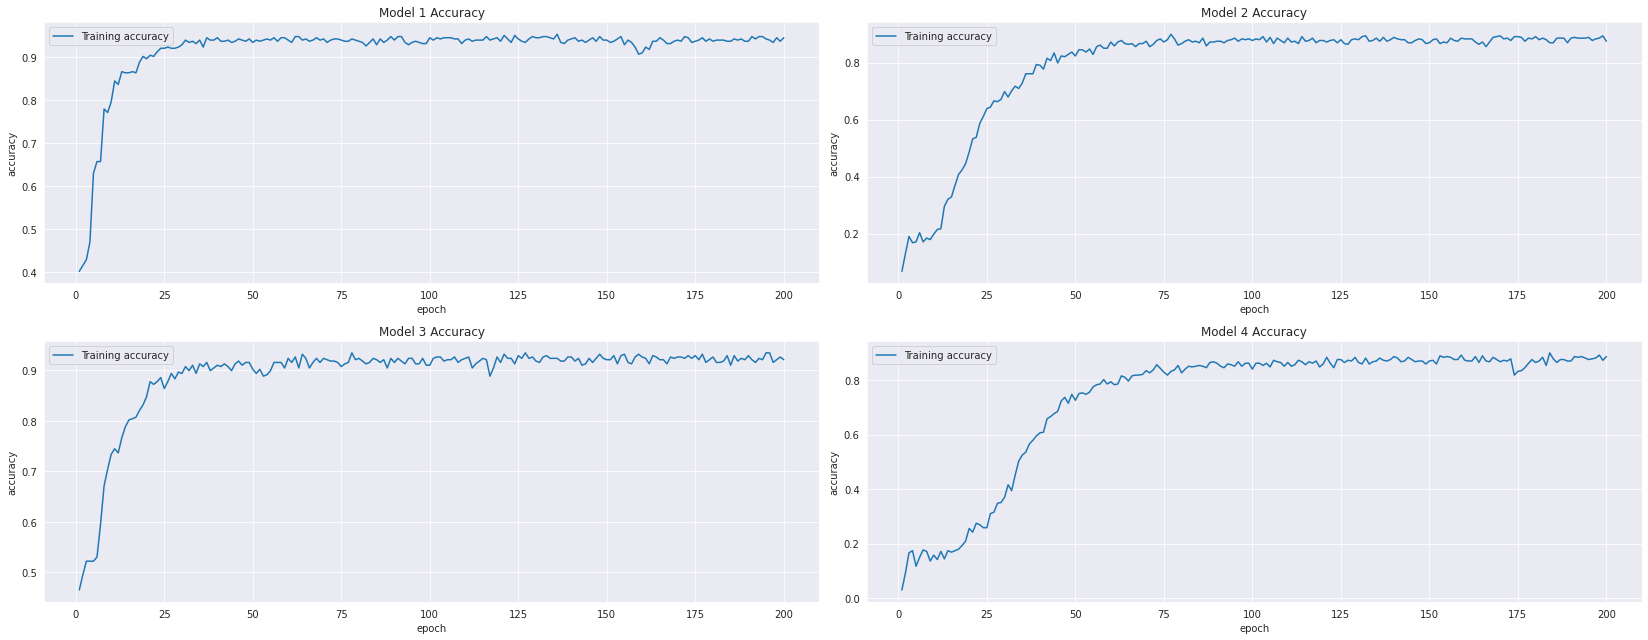

In [53]:
# subplots for model accuracies
fig = plt.figure(figsize=(23,9))

plt.subplot(2,2,1)
plt.plot(model1_accRecord)
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,2)
plt.plot(model2_accRecord)
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,3)
plt.plot(model3_accRecord)
plt.title('Model 3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,4)
plt.plot(model4_accRecord)
plt.title('Model 4 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.tight_layout()

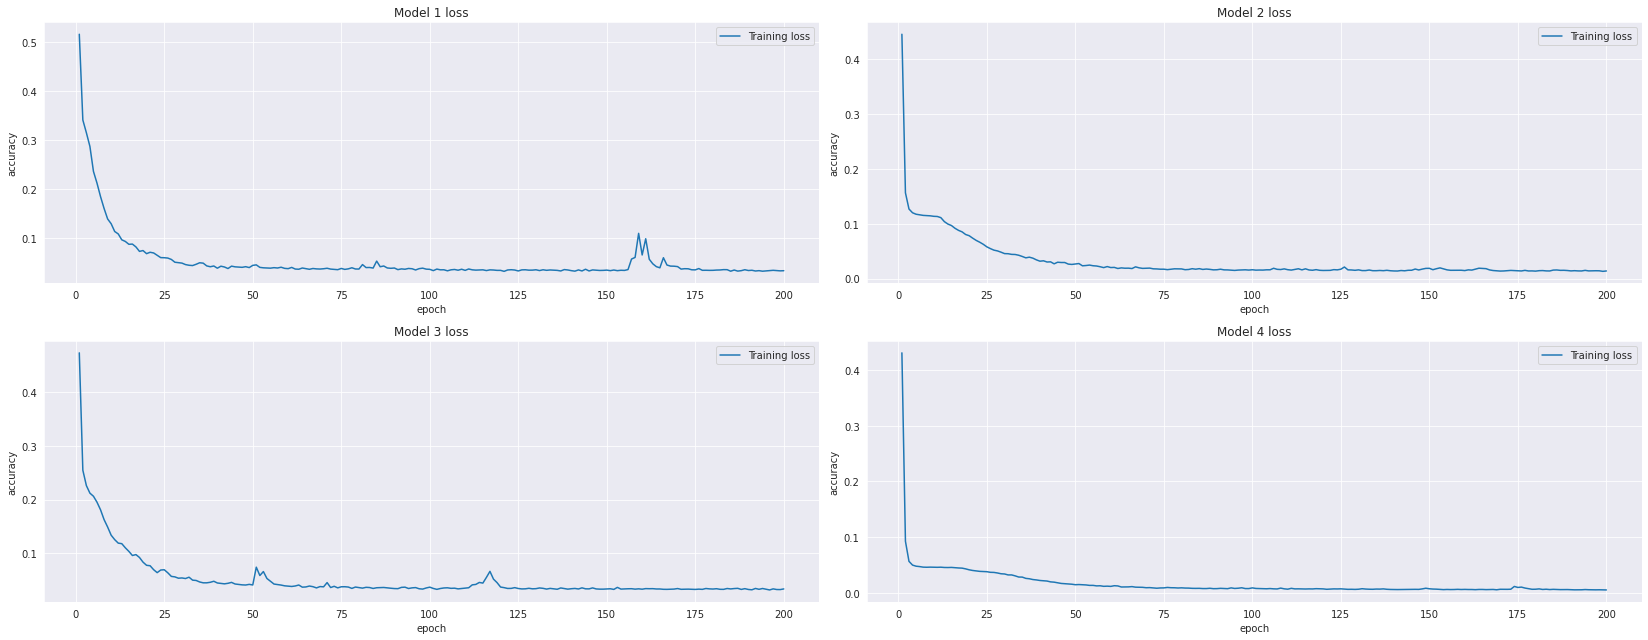

In [54]:
# subplot for model loss
fig = plt.figure(figsize=(23,9))

plt.subplot(2,2,1)
plt.plot(model1_lossRecord)
plt.title('Model 1 loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,2)
plt.plot(model2_lossRecord)
plt.title('Model 2 loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,3)
plt.plot(model3_lossRecord)
plt.title('Model 3 loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,4)
plt.plot(model4_lossRecord)
plt.title('Model 4 loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.tight_layout()

### 5.4. Refitting Models and further evaluation.

---

Now that we know which params are the best, we will now refit the model so that we can use Keras evaluate and predict.

In [55]:
# refitting and retraining
from talos.utils.best_model import best_model

# model1
model_1 = test_sector_model.best_model(metric='accuracy', asc=False)
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model2
model_2 = test_subsector_model.best_model(metric='accuracy', asc=False)
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model3
model_3 = test_archetype_model.best_model(metric='accuracy', asc=False)
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model4
model_4 = test_valuechain_model.best_model(metric='accuracy', asc=False)
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
models = [model_1, model_2, model_3, model_4]

for i in range(4):
  print(models[i].summary())

Model: "sector_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 512)         3771392   
_________________________________________________________________
dense (Dense)                (None, None, 512)         262656    
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 512)         262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         327808    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 256)        

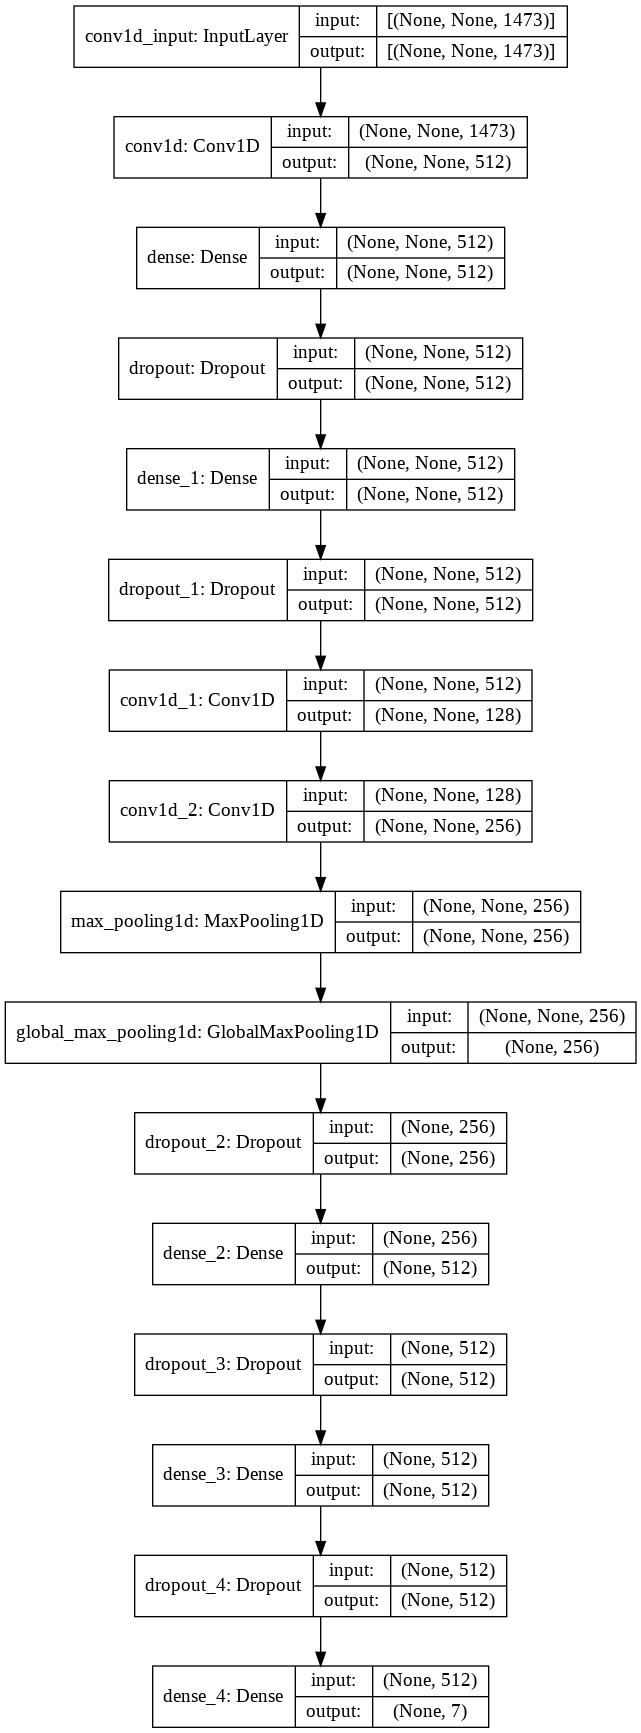

In [71]:
tf.keras.utils.plot_model(model_1, "sector_model.png", show_shapes=True)

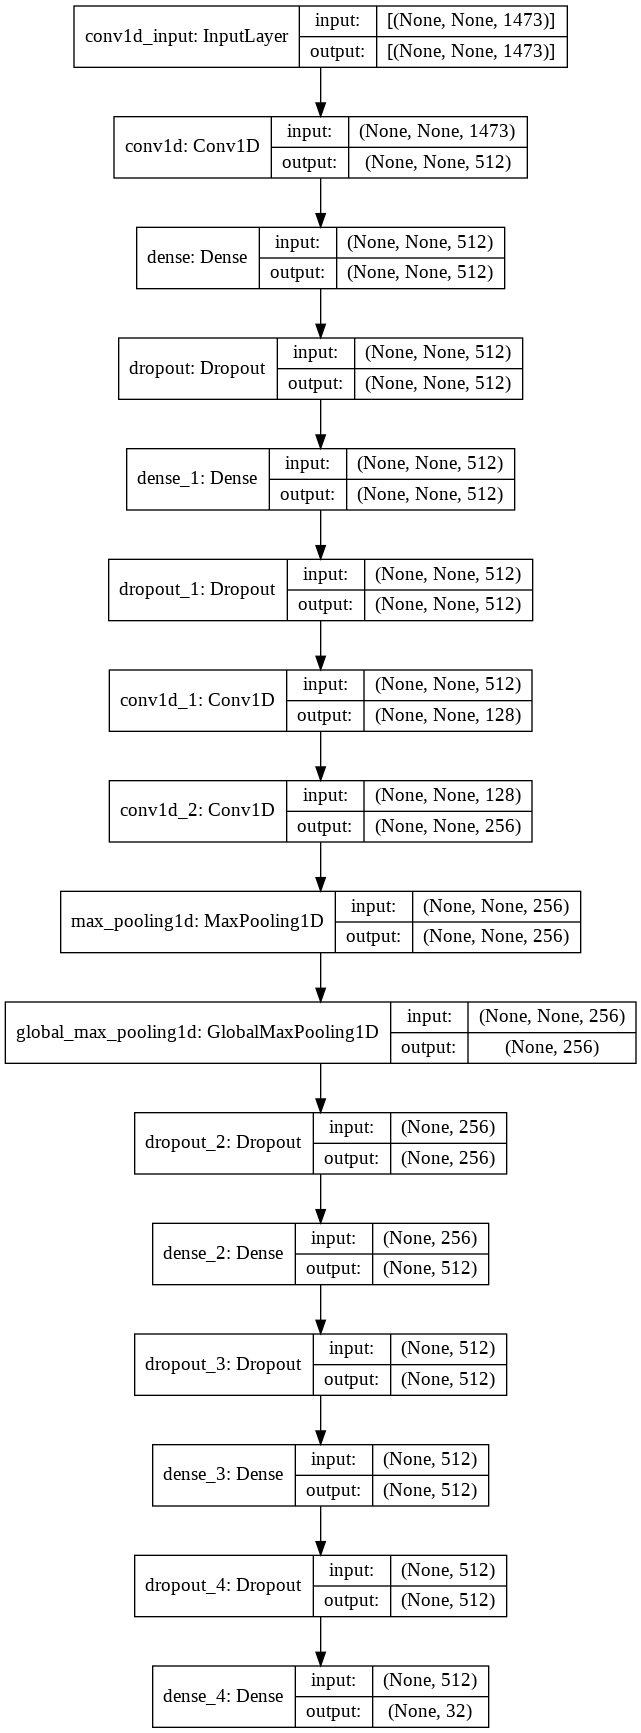

In [70]:
tf.keras.utils.plot_model(model_2, "sub_sector_model.png", show_shapes=True)

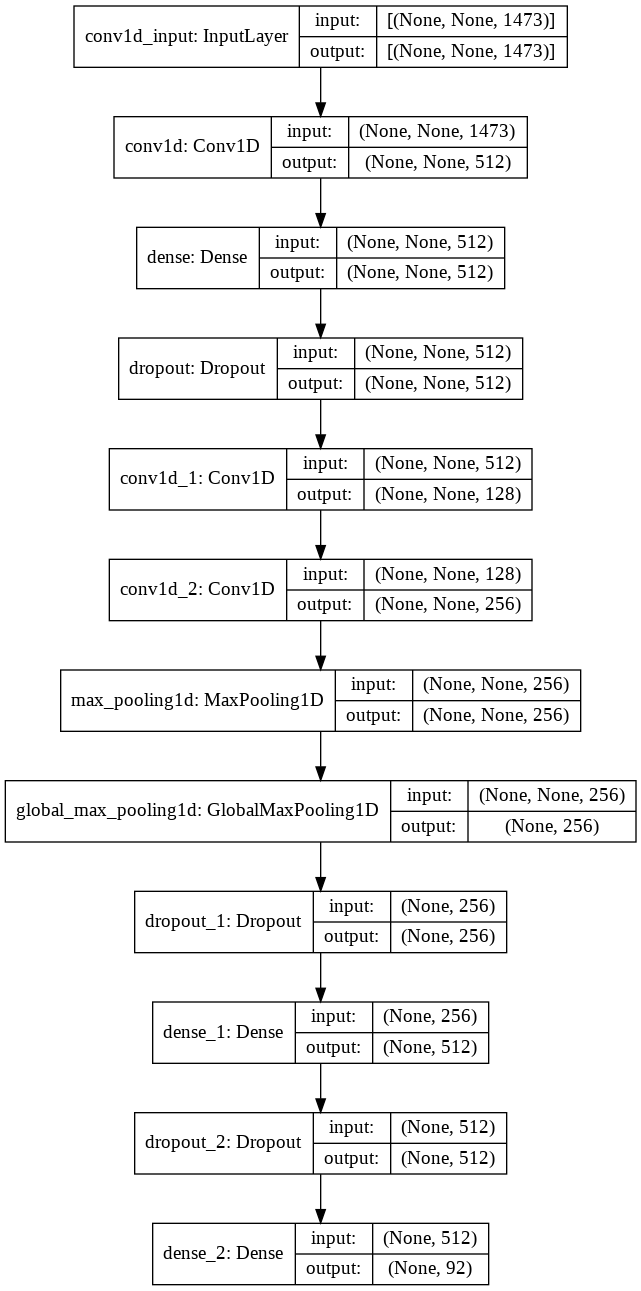

In [65]:
tf.keras.utils.plot_model(model_3, "archetype_model.png", show_shapes=True)

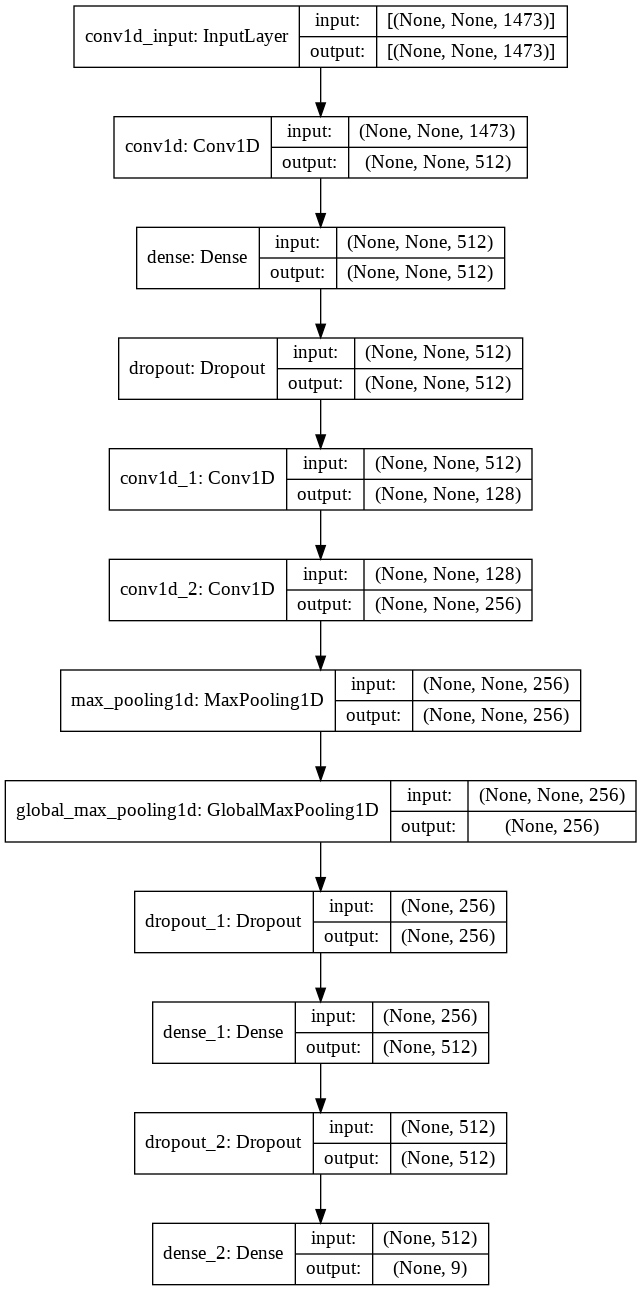

In [66]:
tf.keras.utils.plot_model(model_4, "valuechain_model.png", show_shapes=True)

In [67]:
for i in range(4):
    loss, accuracy = models[i].evaluate(X_test, one_hot(y_test[:,i], tag_counts[i]), verbose=0)

    print(f'Model {i+1} accuracy: {accuracy * 100:.5}%')
    print(f'Model {i+1} loss: {loss:.5}')

Model 1 accuracy: 66.111%
Model 1 loss: 2.2878
Model 2 accuracy: 50.0%
Model 2 loss: 0.67442
Model 3 accuracy: 40.556%
Model 3 loss: 0.24586
Model 4 accuracy: 61.667%
Model 4 loss: 0.83821


In [68]:
results = model_1.predict(X_test)
results = np.argmax(results, axis=1)

for i in range(len(results)):
    print(f'Expected: {y_test[i,0]} Got: {results[i]}')

Expected: 4 Got: 4
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 6 Got: 4
Expected: 6 Got: 2
Expected: 6 Got: 6
Expected: 6 Got: 6
Expected: 0 Got: 1
Expected: 1 Got: 1
Expected: 3 Got: 2
Expected: 0 Got: 0
Expected: 6 Got: 4
Expected: 6 Got: 6
Expected: 6 Got: 6
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 6
Expected: 1 Got: 4
Expected: 6 Got: 6
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 3
Expected: 6 Got: 6
Expected: 0 Got: 4
Expected: 6 Got: 6
Expected: 4 Got: 6
Expected: 1 Got: 1
Expected: 0 Got: 0
Expected: 6 Got: 6
Expected: 1 Got: 1
Expected: 3 Got: 3
Expected: 1 Got: 1
Expected: 6 Got: 6
Expected: 3 Got: 3
Expected: 3 Got: 4
Expected: 1 Got: 1
Expected: 6 Got: 6
Expected: 1 Got: 1
Expected: 1 Got: 1
Expected: 3 Got: 3
Expected: 6 Got: 1
Expected: 4 Got: 1
Expected: 1 Got: 1
Expected: 1 Got: 4
Expected: 3 Got: 3
Expected: 6 Got: 1
Expected: 1 Got: 1
Expected: 6 Got: 6
Expected: 6 

In [72]:
results

array([4, 1, 1, 1, 1, 1, 4, 2, 6, 6, 1, 1, 2, 0, 4, 6, 6, 1, 1, 1, 6, 4,
       6, 1, 1, 3, 6, 4, 6, 6, 1, 0, 6, 1, 3, 1, 6, 3, 4, 1, 6, 1, 1, 3,
       1, 1, 1, 4, 3, 1, 1, 6, 6, 6, 3, 6, 1, 1, 1, 6, 4, 4, 4, 1, 4, 6,
       1, 6, 1, 3, 3, 0, 6, 6, 4, 6, 1, 6, 1, 1, 1, 3, 3, 1, 1, 1, 1, 6,
       1, 6, 1, 1, 6, 4, 1, 6, 4, 6, 4, 4, 1, 1, 6, 6, 1, 1, 1, 1, 1, 3,
       1, 4, 3, 1, 1, 6, 1, 4, 6, 6, 6, 1, 4, 6, 6, 6, 6, 1, 4, 4, 1, 6,
       4, 1, 0, 4, 1, 2, 0, 6, 6, 4, 6, 6, 6, 4, 6, 6, 4, 1, 6, 4, 4, 1,
       1, 1, 4, 3, 1, 1, 1, 4, 6, 3, 5, 1, 3, 4, 1, 1, 1, 6, 1, 6, 1, 6,
       1, 4, 1, 3])

### 5.5. Saving Models.

---

Now that we have trained the model already, we can proceed on to save the model.

In [ ]:
# save models to file
for i in range(4):
    models[i].save(f'./model_{i+1}')

INFO:tensorflow:Assets written to: ./model_1/assets
INFO:tensorflow:Assets written to: ./model_2/assets
INFO:tensorflow:Assets written to: ./model_3/assets
INFO:tensorflow:Assets written to: ./model_4/assets


In [ ]:
!zip -r model_4.zip ./model_4

  adding: model_4/ (stored 0%)
  adding: model_4/assets/ (stored 0%)
  adding: model_4/saved_model.pb (deflated 89%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.index (deflated 59%)
  adding: model_4/variables/variables.data-00000-of-00001 (deflated 9%)


---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)
7. [How to Develop a Multichannel CNN Model for Text Classification](https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/)

